# Análise Exploratória - Projeto 3

___
<div id="indice">

## Índice

- [Bibliotecas utilizadas](#biblio)
- [Importação da base de dados](#base-dados)
1. [Escolaridade e Rendimento](#esc-bruto)
2. [Distribuição Salarial por Faixa de Rendimento](#salario-faixa)
3. [Análise por Sexo e Cor/Raça](#sexo-cor)
4. [Análise por Idade](#idade)
5. [Distribuição de Ocupação](ocupa)
6. [Considerações Finais](#finais)

___
<div id="biblio"></div>

#####  Importação de bibliotecas utilizadas

In [11]:
# Importações
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

___
> **Qual o salário mais provável, baseado no tempo de escolaridade de uma pessoa?**

<div id="base-dados"></div>

##### **Base de dados.**
- Importação da base de dados.
- Criação das variáveis.
<br><br>

[Índice](#indice)

In [12]:
dados = pd.read_csv("pnad23_filtrado.csv")
dados.head(3)

,Estado,Sexo,Idade,Cor_ou_Raça,Escolaridade,Ocupação,Faixa_de_rendimento,Rendimento_Bruto
0,Rondônia,Homem,30,Parda,Regular do ensino médio ou do 2º grau,Conta Própria,[3SM]+1 a [5SM],5000.0
1,Rondônia,Mulher,50,Parda,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3500.0
2,Rondônia,Mulher,54,Branca,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3700.0


In [9]:
dados.dtypes

Estado                  object
Sexo                    object
Idade                    int64
Cor_ou_Raça             object
Escolaridade            object
Ocupação                object
Faixa_de_rendimento     object
Rendimento_Bruto       float64
dtype: object

In [10]:
dados['Ocupação'] = dados.Ocupação.replace("Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar", "Militar")
dados['Ocupação'] = dados['Ocupação'].replace("Empregado do setor público (inclusive empresas de economia mista)", "Empregado do setor público")

<div id="esc-bruto"></div>

##### **Análise de relação de Escolaridade X Rendimento Bruto**
- Cálculo de média e mediana para cada tipo de escolaridade.
- Visualizando em forma de histograma.

[Índice](#indice)

In [11]:
# Calculando média para cada tipo de escolaridade
media_salario = dados.groupby("Escolaridade")["Rendimento_Bruto"].mean()
media_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,1166.118881
"Antigo científico, clássico, etc. (médio 2º ciclo)",3239.437500
Antigo ginásio (médio 1º ciclo),2135.835387
Antigo primário (elementar),1720.580989
Classe de alfabetização - CA,993.057121
Creche (disponível apenas no questionário anual de educação),920.000000
Doutorado,11534.009063
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1505.987119
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1937.792736


In [12]:
# Calculando mediana para cada tipo de escolaridade
mediana_salario = dados.groupby("Escolaridade")["Rendimento_Bruto"].median()
mediana_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,960.0
"Antigo científico, clássico, etc. (médio 2º ciclo)",2000.0
Antigo ginásio (médio 1º ciclo),1500.0
Antigo primário (elementar),1320.0
Classe de alfabetização - CA,700.0
Creche (disponível apenas no questionário anual de educação),600.0
Doutorado,10000.0
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1320.0
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1500.0


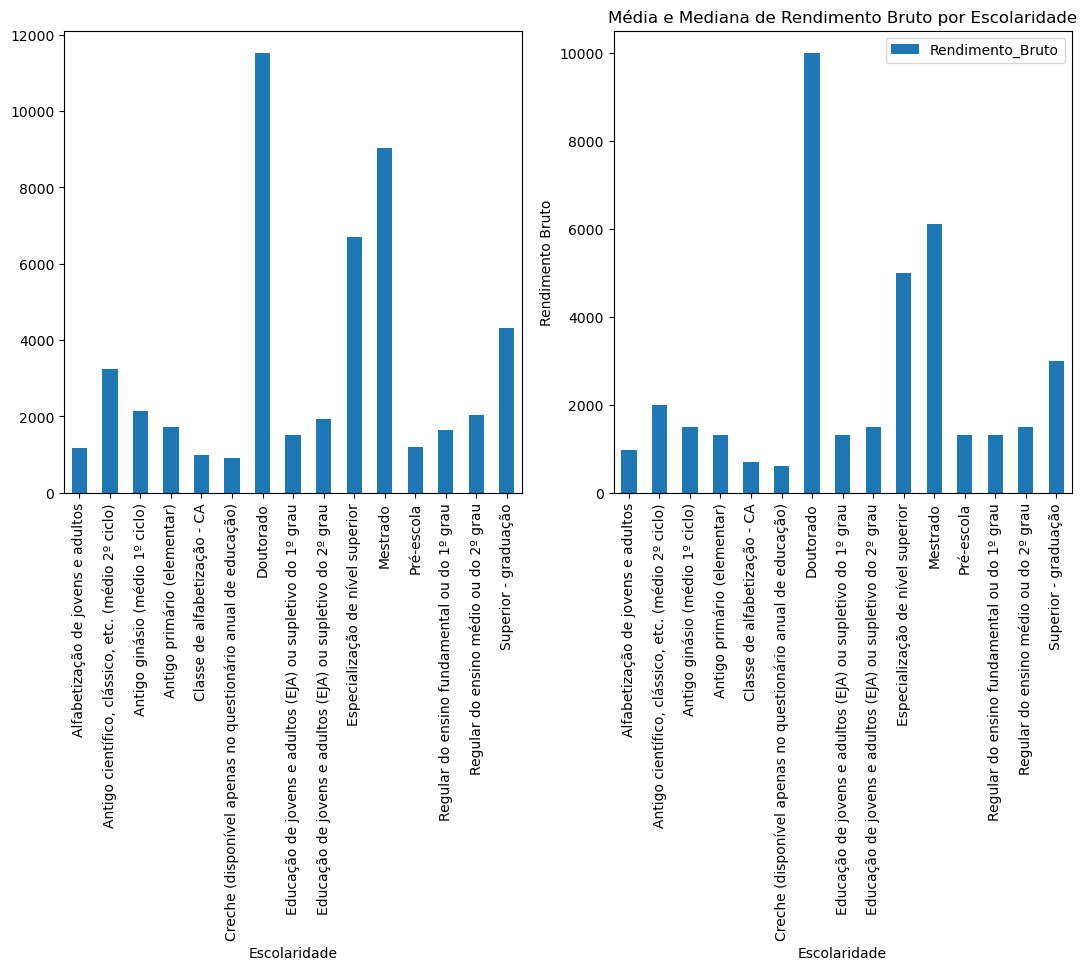

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
media_salario.plot(kind="bar")
plt.subplot(122)
mediana_salario.plot(kind="bar")
plt.xlabel("Escolaridade")
plt.ylabel("Rendimento Bruto")
plt.title("Média e Mediana de Rendimento Bruto por Escolaridade")
plt.legend()
plt.show()

___
<div id="sexo-cor"></div>

##### **Análise por Sexo e Cor/Raça**
- Aqui será feita a busca por valores aberrantes e por amostras que possam alterar demais os resultados finais.

[Índice](#indice)

In [ ]:
# Dados de raça:
df_raca = dados["Cor_ou_Raça"]
df_raca.value_counts().to_frame()

,count
Cor_ou_Raça,
Parda,81604
Branca,73012
Preta,18564
Amarela,1161
Indigena,825
Ignorado,15


In [15]:
rend_raca = dados.groupby("Cor_ou_Raça")["Rendimento_Bruto"]
media_raca = rend_raca.mean().sort_values(ascending=False)
media_raca.to_frame()

,Rendimento_Bruto
Cor_ou_Raça,
Ignorado,8521.333333
Amarela,3636.186047
Branca,3452.221155
Parda,2098.726129
Preta,2058.074445
Indigena,1983.036364


##### **Remoção de valores aberrantes**

- Baseado na análise dos valores de rendimento bruto separado em sexo e raça, foi decidido remover os valores que marcaram "Ignorado" na coluna "Cor_ou_Raça", uma vez que esses representam uma parte muito pequena da quantidade total de dados, mas possuem uma média muito elevada de Rendimento Bruto

In [16]:
ignorados = dados["Cor_ou_Raça"] == "Ignorado"
dados_corrigidos = dados.drop(dados[ignorados].index)

In [17]:
media_raca_corrigida = (
    dados_corrigidos.groupby("Cor_ou_Raça")["Rendimento_Bruto"]
    .mean()
    .sort_values(ascending=False)
)
media_raca_corrigida.to_frame()

,Rendimento_Bruto
Cor_ou_Raça,
Amarela,3636.186047
Branca,3452.221155
Parda,2098.726129
Preta,2058.074445
Indigena,1983.036364


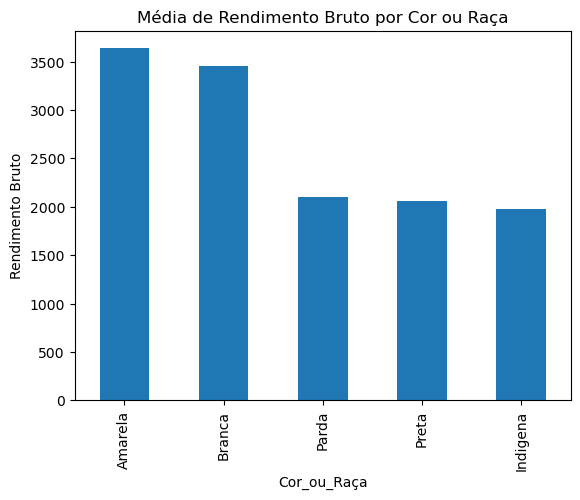

In [18]:
media_raca_corrigida.plot(kind="bar")
plt.title("Média de Rendimento Bruto por Cor ou Raça")
plt.ylabel("Rendimento Bruto")
plt.show()

##### **Dados de Sexo**

In [19]:
dados["Sexo"].value_counts().to_frame()

,count
Sexo,
Homem,102907
Mulher,72274


In [20]:
df_sexo = dados.groupby("Sexo")["Rendimento_Bruto"]
media_sexo = df_sexo.mean()
media_sexo.to_frame()

,Rendimento_Bruto
Sexo,
Homem,2876.170941
Mulher,2373.349005


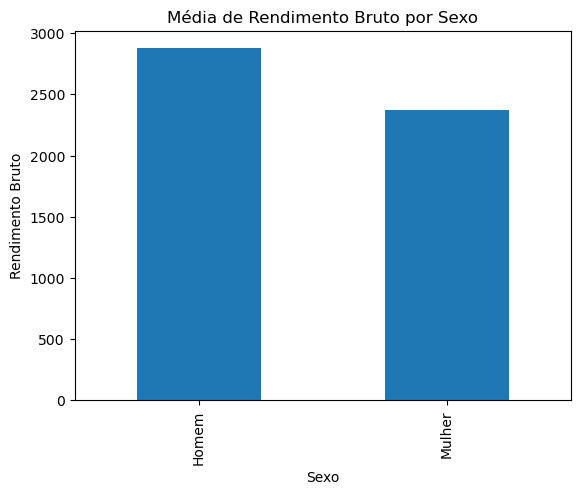

In [21]:
media_sexo.plot(kind="bar")
plt.title("Média de Rendimento Bruto por Sexo")
plt.ylabel("Rendimento Bruto")
plt.show()

___
<div id="idade"></div>

##### **Análise por Idade**

[Índice](#indice)

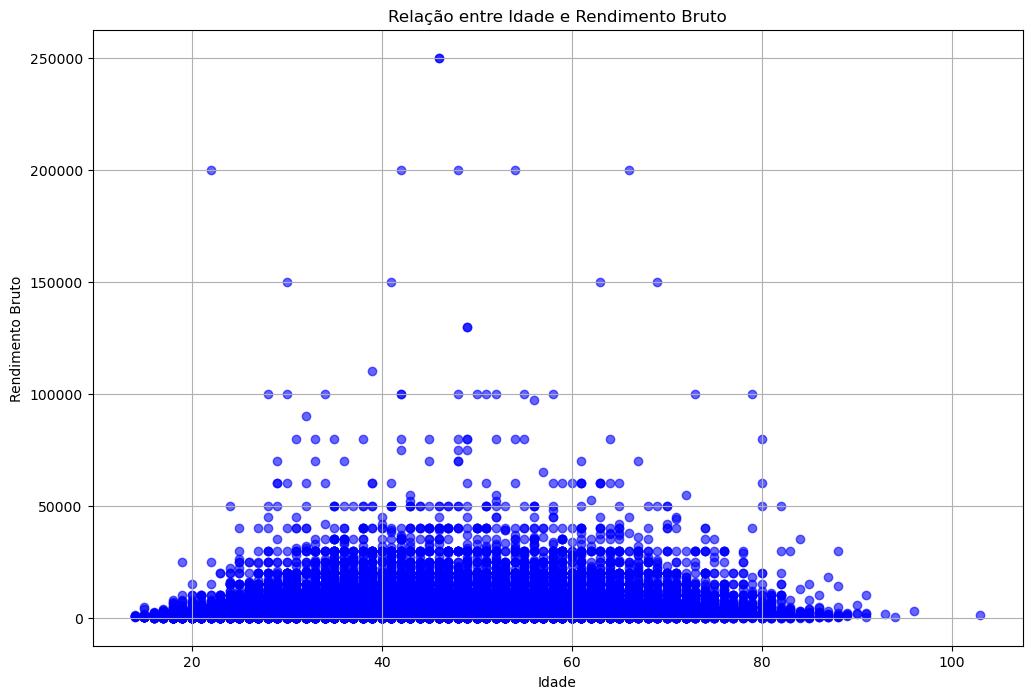

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(dados["Idade"], dados["Rendimento_Bruto"], color="Blue", alpha=0.6)

plt.title("Relação entre Idade e Rendimento Bruto")
plt.xlabel("Idade")
plt.ylabel("Rendimento Bruto")
plt.grid(True)
plt.show()

##### **Separando por faixa etaria**
- Vamos classificar cada membro do dataframe com base na sua faixa etaria para facilitar a vizualização do impacto da idade na renda media

In [23]:
# Função para categorizar as idades em faixas etárias
def categorizar_faixa_etaria(idade):
    if idade <= 11:
        return 'Criança'
    elif idade <= 17:
        return 'Adolescente'
    elif idade <= 24:
        return 'Jovem adulto'
    elif idade <= 64:
        return 'Adulto'
    else:
        return 'Idoso'

# Criando a nova coluna 'Faixa_Etaria' no DataFrame
dados['Faixa_Etaria'] = dados['Idade'].apply(categorizar_faixa_etaria)

# Exibindo as primeiras linhas para verificar
df_faixa_etaria = dados.groupby("Faixa_Etaria")["Rendimento_Bruto"]
media_faixa_etaria = df_faixa_etaria.mean()
media_faixa_etaria.to_frame()


,Rendimento_Bruto
Faixa_Etaria,
Adolescente,998.197802
Adulto,2773.258852
Idoso,3297.694774
Jovem adulto,1530.243773


##### **Grafico de rendimento bruto por faixa etaria**

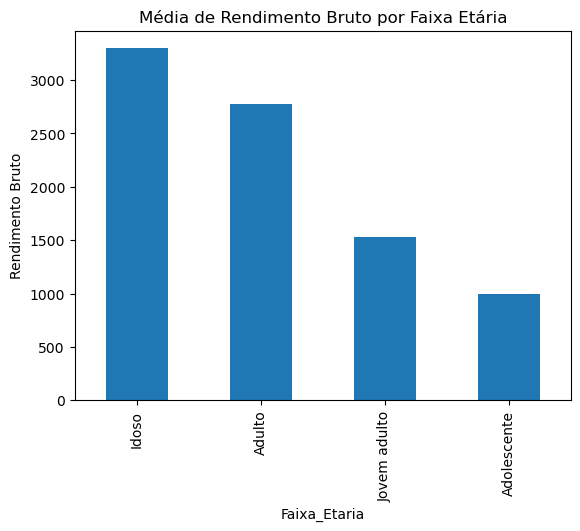

In [26]:
media_faixa_etaria.sort_values(ascending=False).plot(kind="bar")
plt.title("Média de Rendimento Bruto por Faixa Etária")
plt.ylabel("Rendimento Bruto")
plt.show()

___
<div id="ocupa"></div>

##### **Distribuição por Ocupação**

[Índice](#indice)

In [24]:
rendimento_ocupacao_media = dados.groupby("Ocupação")["Rendimento_Bruto"].mean()
rendimento_ocupacao_media.to_frame()

,Rendimento_Bruto
Ocupação,
Conta Própria,2134.233617
Empregado do setor privado,2343.454260
Empregado do setor público,4189.031607
Empregador,6932.884492
Militar,6369.334082
Trabalhador doméstico,1108.325629


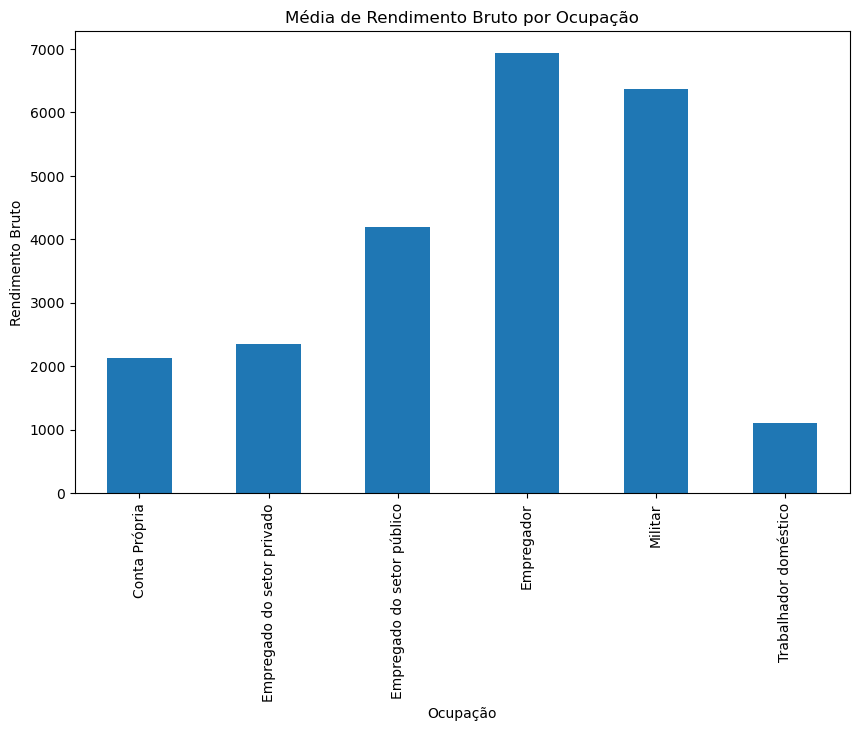

In [25]:
rendimento_ocupacao_media.plot(kind="bar", figsize=(10, 6))
plt.title("Média de Rendimento Bruto por Ocupação")
plt.ylabel("Rendimento Bruto")
plt.show()

___
<div id="finais"></div>

##### **Considerações Finais**

[Índice](#indice)

Ao analizar os graficos, é possivel concluir que os principais fatores que influenciam o rendimento bruto são o nivel de escolaridade e a ocupação, com niveis de escolaridade maiores, como doutorado, possuindo uma renda media muito maior que o resto, e ocupações empregador e militares tendo uma renda media maior.<br><br>
Tambem é possivel perceber que há uma disparidade de renda media entre generos e raça, com homens ganhando mais do que mulheres e pessoas de raça amarela e branca ganhando mais que pessoas pardas, negras e indigenas.<br><br>
Por fim, tambem é possivel vizualizar que a faixa etaria tambem afeta o rendimento medio, com pessoas mais velhas possuindo um rendimento medio maior, provavelmente devido a maior experiencia no mercado de trabalho e em suas areas de conhecimento.